# Load Train Dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
pd.options.display.max_columns = 60

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Microsoft-cybersecurity/new_train_sample.csv")

In [ ]:
df = train_data.copy()

In [ ]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.shape

(4758418, 46)

In [ ]:
# columns
df.columns

Index(['Unnamed: 0', 'Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp',
       'DetectorId', 'AlertTitle', 'Category', 'MitreTechniques',
       'IncidentGrade', 'ActionGrouped', 'ActionGranular', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'EmailClusterId', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationId',
       'ApplicationName', 'OAuthApplicationId', 'ThreatFamily', 'FileName',
       'FolderPath', 'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily',
       'OSVersion', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict',
       'CountryCode', 'State', 'City'],
      dtype='object')

In [ ]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Id                  int64  
 2   OrgId               int64  
 3   IncidentId          int64  
 4   AlertId             int64  
 5   Timestamp           object 
 6   DetectorId          int64  
 7   AlertTitle          int64  
 8   Category            object 
 9   MitreTechniques     object 
 10  IncidentGrade       object 
 11  ActionGrouped       object 
 12  ActionGranular      object 
 13  EntityType          object 
 14  EvidenceRole        object 
 15  DeviceId            int64  
 16  Sha256              int64  
 17  IpAddress           int64  
 18  Url                 int64  
 19  AccountSid          int64  
 20  AccountUpn          int64  
 21  AccountObjectId     int64  
 22  AccountName         int64  
 23  DeviceName          int64  
 24  NetworkMessageId    int6

# Data Preprocessing

*Handling Missing Data*

In [ ]:
# check the count of duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
# drop the duplicates
df.drop_duplicates(inplace=True)


In [ ]:
# check the null values in percent
df.isnull().mean() * 100


Unnamed: 0             0.000000
Id                     0.000000
OrgId                  0.000000
IncidentId             0.000000
AlertId                0.000000
Timestamp              0.000000
DetectorId             0.000000
AlertTitle             0.000000
Category               0.000000
MitreTechniques       57.437913
IncidentGrade          0.541672
ActionGrouped         99.407093
ActionGranular        99.407093
EntityType             0.000000
EvidenceRole           0.000000
DeviceId               0.000000
Sha256                 0.000000
IpAddress              0.000000
Url                    0.000000
AccountSid             0.000000
AccountUpn             0.000000
AccountObjectId        0.000000
AccountName            0.000000
DeviceName             0.000000
NetworkMessageId       0.000000
EmailClusterId        98.987542
RegistryKey            0.000000
RegistryValueName      0.000000
RegistryValueData      0.000000
ApplicationId          0.000000
ApplicationName        0.000000
OAuthApp

In [ ]:
# columns having null values 50% above
null_cols = df.columns[df.isnull().sum() != 0]
null_cols

Index(['MitreTechniques', 'IncidentGrade', 'ActionGrouped', 'ActionGranular',
       'EmailClusterId', 'ThreatFamily', 'ResourceType', 'Roles',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict'],
      dtype='object')

In [ ]:
columns_to_drop = ['MitreTechniques', 'ActionGrouped', 'ActionGranular',
       'EmailClusterId', 'ThreatFamily', 'ResourceType', 'Roles',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict']

df.drop(columns=columns_to_drop, axis='columns', inplace=True)

In [ ]:
#
df['IncidentGrade'].isnull().sum()


np.int64(25775)

In [ ]:
# drop the null values in target variable
df.dropna(subset=['IncidentGrade'], inplace=True)

In [ ]:
# drop the ID and unnecessary columns
df.drop(columns=['Unnamed: 0'], axis="columns", inplace=True)

In [ ]:
df.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,BenignPositive,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,242,1445,10630
1,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
2,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
3,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,TruePositive,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,97007,9177,3586,5,66,242,1445,10630
4,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,39978,114449,3586,5,66,242,1445,10630


## **Data Format**

In [ ]:
df.head(2)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,BenignPositive,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,242,1445,10630
1,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630


In [ ]:
# convert the TimeStamp into datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
# Create separate columns for date and time
df['Date'] = df['Timestamp'].dt.date
df['Time'] = df['Timestamp'].dt.time

In [ ]:
# convert date in into datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# convert the Time column into single unit seconds
df['Time_in_seconds'] = df['Timestamp'].dt.hour * 3600 + df['Timestamp'].dt.minute * 60 + df['Timestamp'].dt.second

In [ ]:
# drop the TimeStamp column
df.drop('Timestamp', axis=1, inplace=True)

In [ ]:
# drop the Time column
df.drop('Time', axis=1, inplace=True)

In [ ]:
# split the date into day,month, year
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
# drop the Date columns
df.drop("Date", axis=1, inplace=True)

# EDA

In [ ]:
df.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Time_in_seconds,Year,Month,Day
0,1709396985476,26,18583,687462,31,813,Malware,BenignPositive,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,242,1445,10630,21407,2024,6,6
1,927712939180,33,5065,3990,38,25,Impact,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,38709,2024,6,3
2,1090921697002,201,150787,807590,419,444,Execution,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,13000,2024,6,13
3,1434519079555,204,108287,28575,44,1233,SuspiciousActivity,TruePositive,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,97007,9177,3586,5,66,242,1445,10630,60897,2024,6,8
4,1005022347708,54,528202,1458226,102,58829,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,39978,114449,3586,5,66,242,1445,10630,10081,2024,6,9


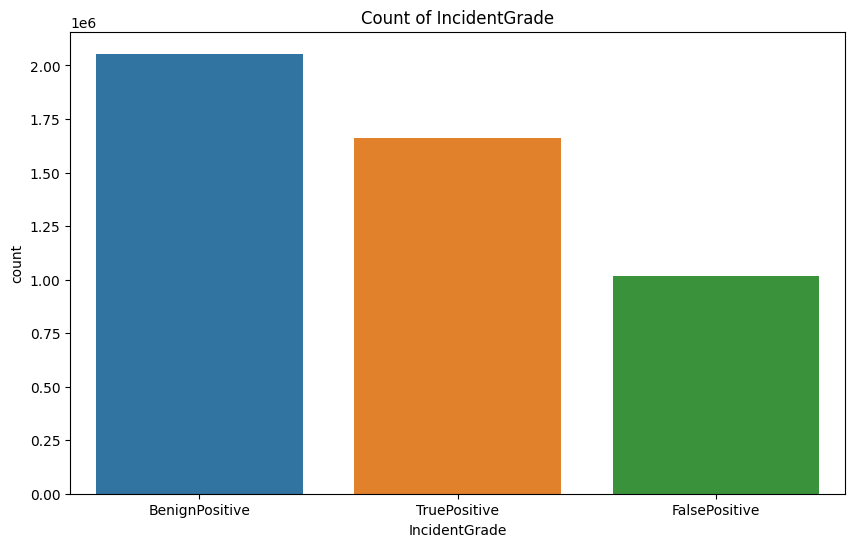

In [ ]:
# countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='IncidentGrade', data=df, hue="IncidentGrade")
plt.title("Count of IncidentGrade")
plt.show()


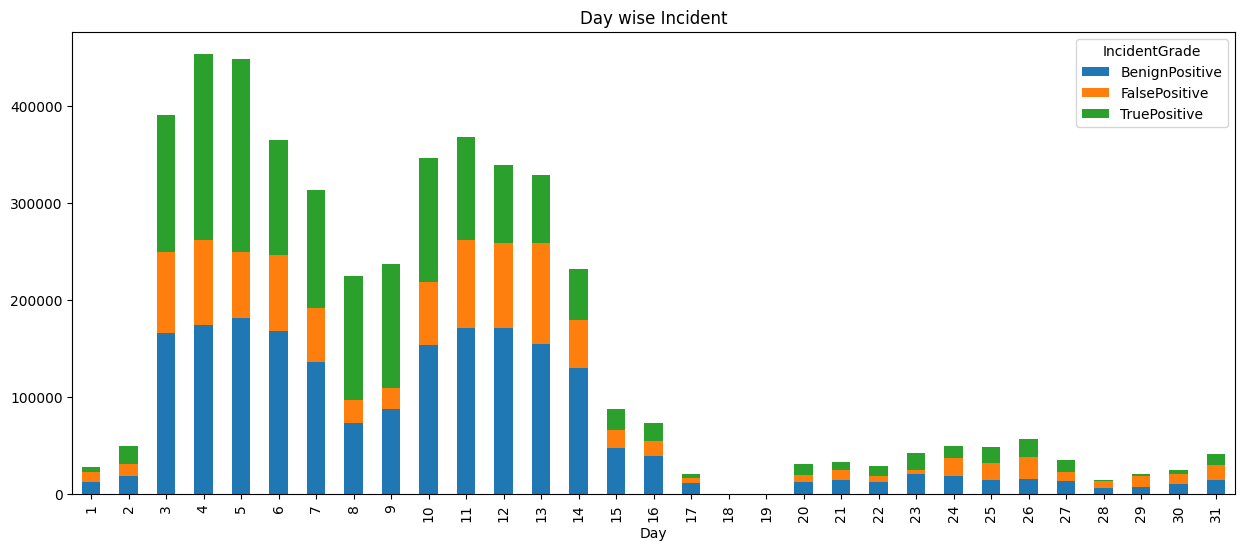

In [ ]:
# day wise IncidentGrade
day_incident = df.groupby(['Day', 'IncidentGrade']).size().unstack()
day_incident.plot(kind='bar',stacked=True, figsize=(15,6))
plt.title("Day wise Incident")
plt.show()

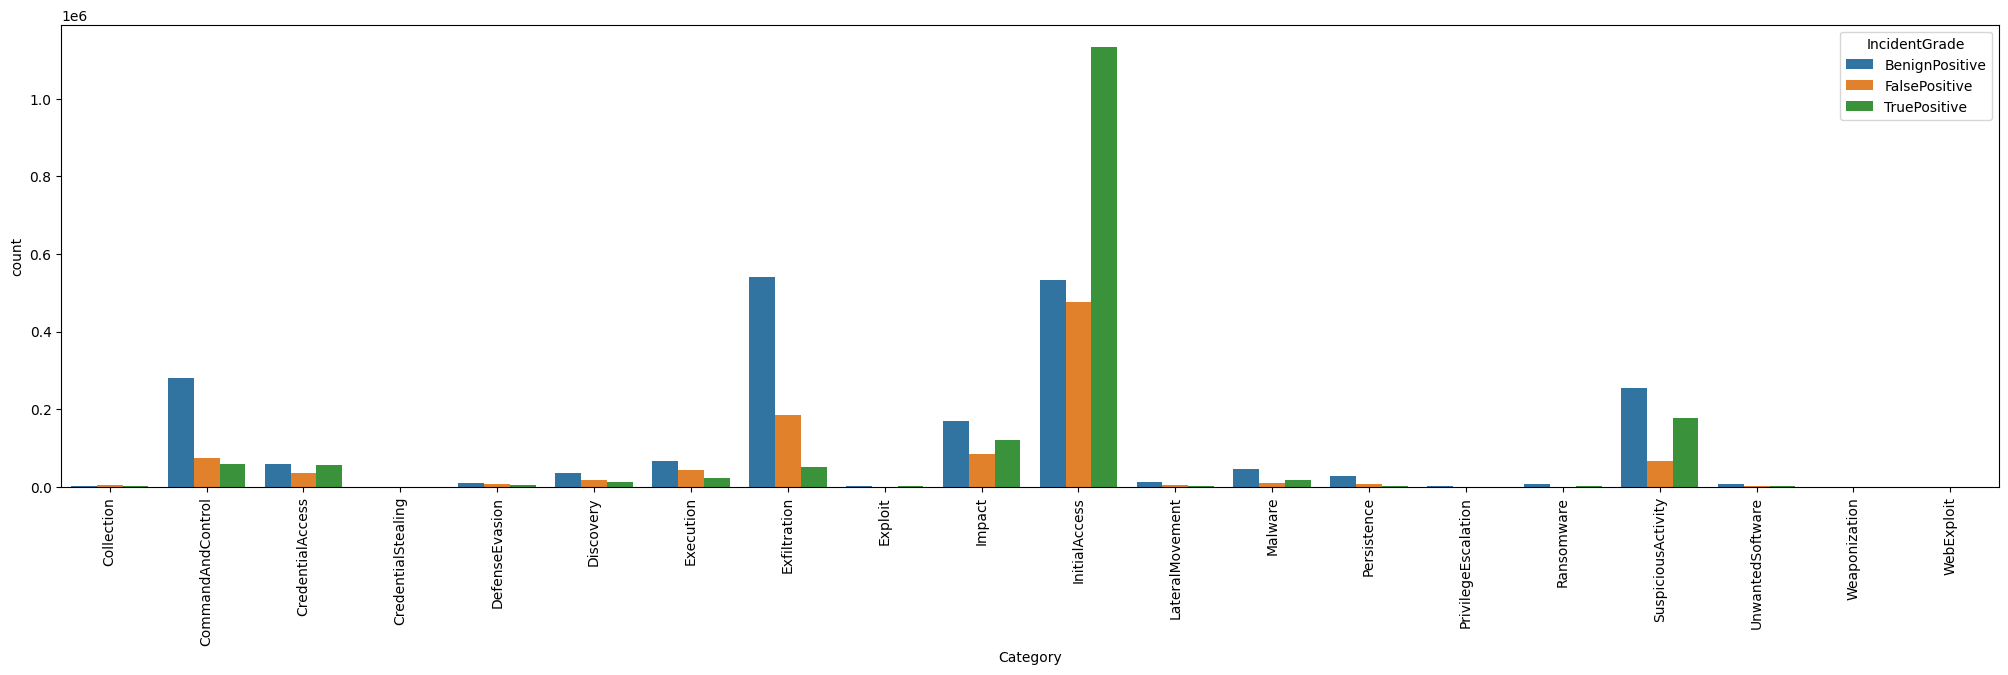

In [ ]:
# Category by incident
category_by_incident = df.groupby(['Category', 'IncidentGrade']).size().reset_index(name='count')
plt.figure(figsize=(25,6))
sns.barplot(data=category_by_incident, x='Category', y='count', hue='IncidentGrade')
plt.xticks(rotation=90)
plt.show()

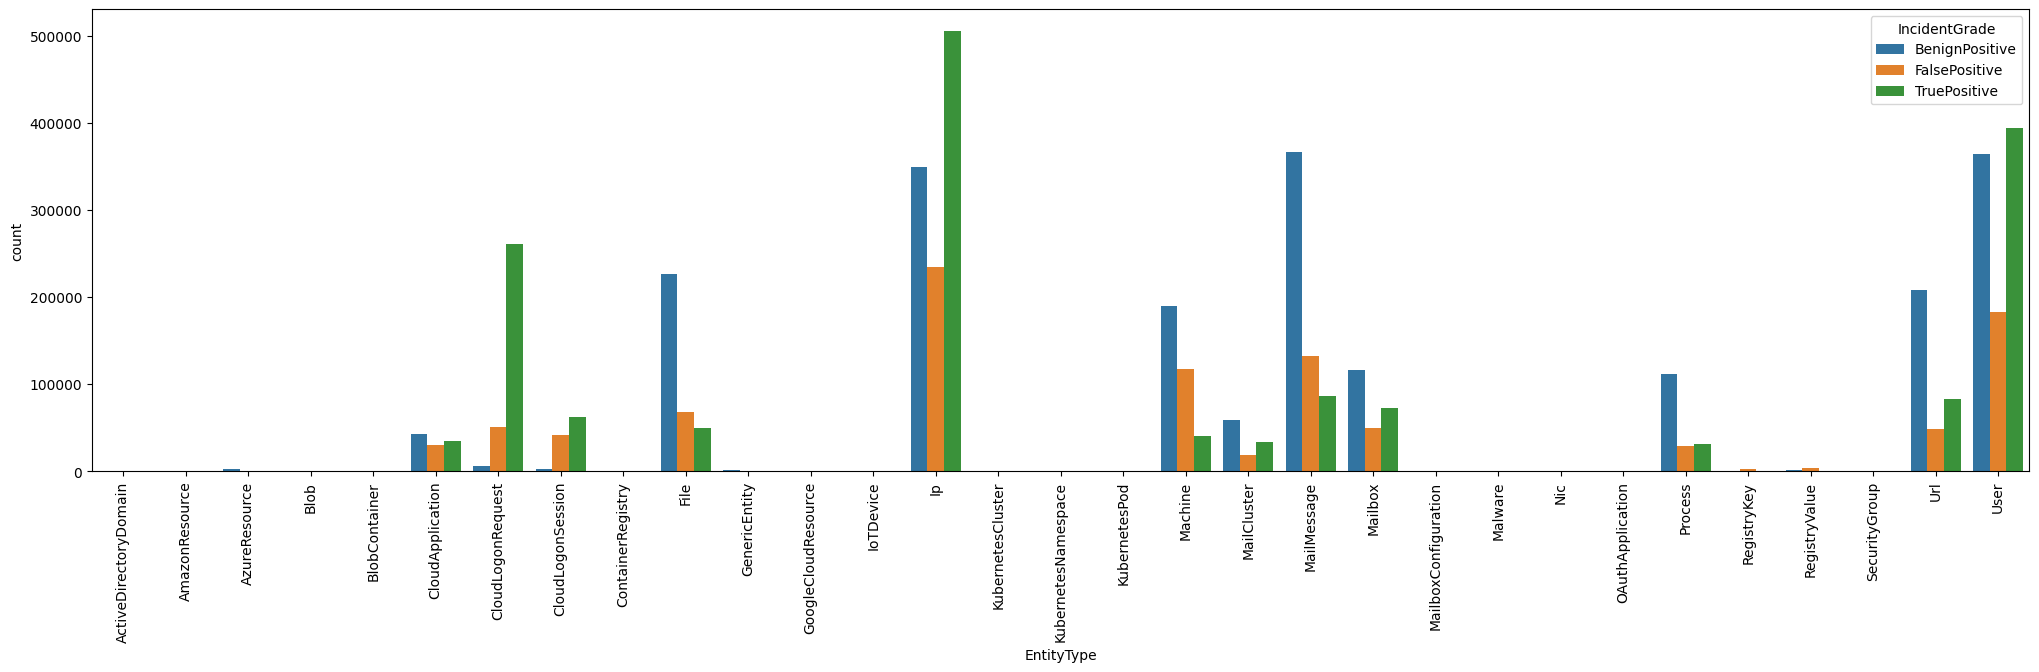

In [ ]:
# EntityType
entitytype_incident = df.groupby(['EntityType', 'IncidentGrade']).size().reset_index(name="count")
plt.figure(figsize=(25,6))
sns.barplot(data=entitytype_incident, x='EntityType', y='count', hue='IncidentGrade')
plt.xticks(rotation=90)
plt.show()

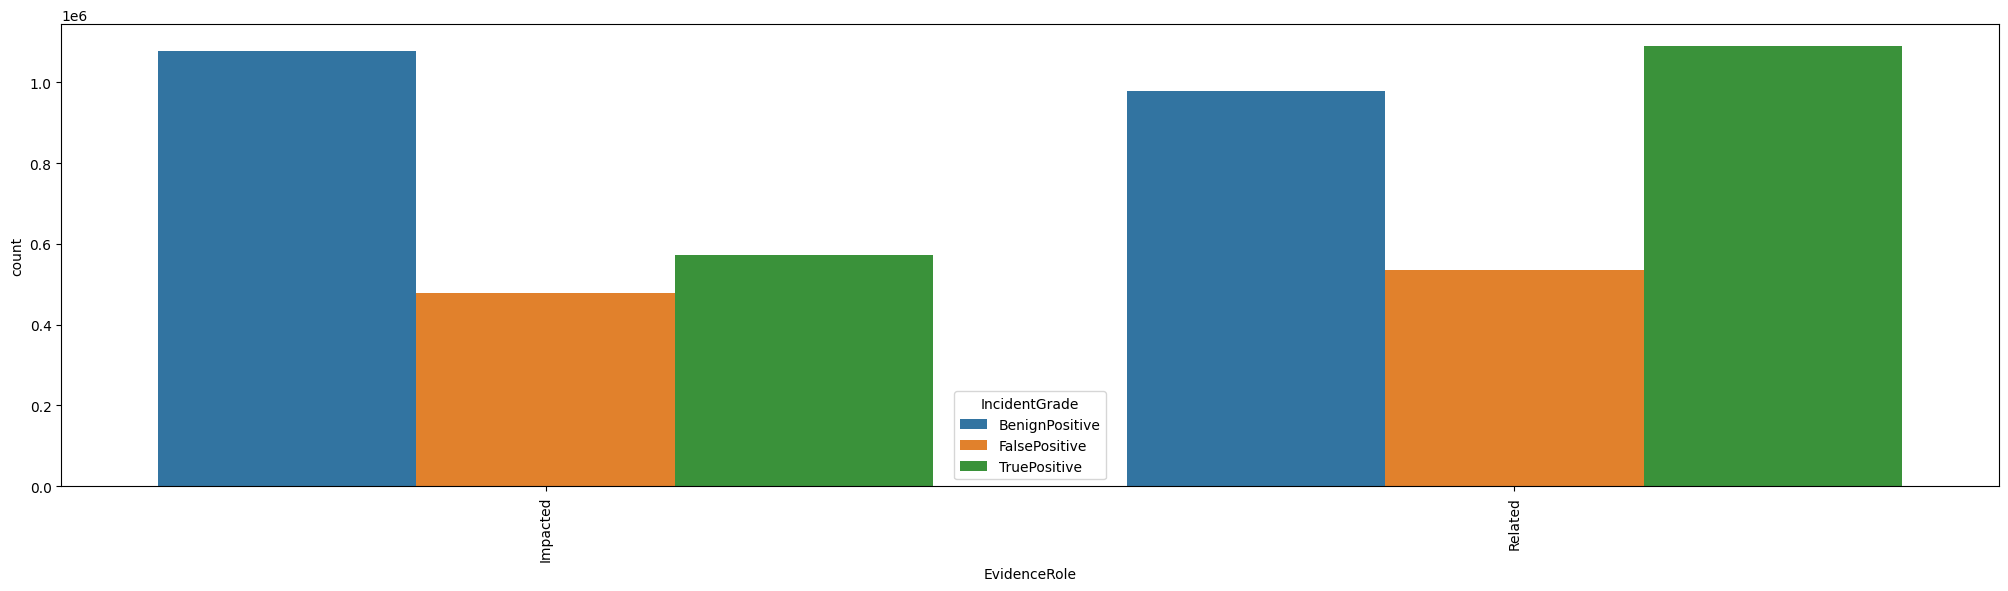

In [ ]:
evidencerole_incident = df.groupby(['EvidenceRole', 'IncidentGrade']).size().reset_index(name='count')
plt.figure(figsize=(25,6))
sns.barplot(data=evidencerole_incident, x='EvidenceRole', y='count', hue='IncidentGrade')
plt.xticks(rotation=90)
plt.show()

# Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# columns with categorical values
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols


Index(['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole'], dtype='object')

In [ ]:
# Category
df['Category'].unique()

array(['Malware', 'Impact', 'Execution', 'SuspiciousActivity',
       'Exfiltration', 'InitialAccess', 'DefenseEvasion',
       'CommandAndControl', 'Discovery', 'Persistence',
       'CredentialAccess', 'LateralMovement', 'Ransomware',
       'UnwantedSoftware', 'PrivilegeEscalation', 'Exploit', 'Collection',
       'CredentialStealing', 'WebExploit', 'Weaponization'], dtype=object)

In [ ]:
# IncidentGrade
df['IncidentGrade'].unique()

array(['BenignPositive', 'TruePositive', 'FalsePositive'], dtype=object)

In [ ]:
# EntityType
df['EntityType'].unique()

array(['File', 'Machine', 'Ip', 'CloudLogonSession', 'User',
       'CloudLogonRequest', 'Process', 'Mailbox', 'Url', 'MailMessage',
       'MailCluster', 'CloudApplication', 'RegistryKey', 'AzureResource',
       'Malware', 'RegistryValue', 'OAuthApplication', 'GenericEntity',
       'SecurityGroup', 'Blob', 'ActiveDirectoryDomain', 'BlobContainer',
       'IoTDevice', 'KubernetesCluster', 'MailboxConfiguration', 'Nic',
       'GoogleCloudResource', 'KubernetesPod', 'ContainerRegistry',
       'KubernetesNamespace', 'AmazonResource'], dtype=object)

In [ ]:
# EvidenceRole
df['EvidenceRole'].unique()

array(['Related', 'Impacted'], dtype=object)

In [ ]:
# Convert the all categorical variable into numerical

for col in categorical_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

# Feature Selection

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Microsoft-cybersecurity/preprocessed_train.csv")

In [ ]:
# save the dataset ,to prevent re-run the data preprocessing and Encoding
# df.to_csv("preprocessed_train.csv", index=False)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier


In [ ]:
df.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Time_in_seconds,Year,Month,Day
0,1709396985476,26,18583,687462,31,813,12,0,9,1,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,242,1445,10630,21407,2024,6,6
1,927712939180,33,5065,3990,38,25,9,0,17,0,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,38709,2024,6,3
2,1090921697002,201,150787,807590,419,444,6,0,17,0,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,13000,2024,6,13
3,1434519079555,204,108287,28575,44,1233,16,2,9,1,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,97007,9177,3586,5,66,242,1445,10630,60897,2024,6,8
4,1005022347708,54,528202,1458226,102,58829,7,0,9,0,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,39978,114449,3586,5,66,242,1445,10630,10081,2024,6,9


In [ ]:
df.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Time_in_seconds', 'Year', 'Month', 'Day'],
      dtype='object')

In [ ]:


X = df.drop(columns=['IncidentGrade'])
y = df['IncidentGrade']


# Calculate Mutual Information (MI) scores for all features at once
mi_scores = mutual_info_classif(X, y, random_state=42)

# Convert MI scores into a Pandas Series for easy viewing
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("Features of mutual information: ")
print(mi_scores)

Features of mutual information: 
AlertId               0.907127
IncidentId            0.861353
OrgId                 0.832228
AlertTitle            0.546483
DetectorId            0.528766
AccountUpn            0.476746
AccountSid            0.444422
AccountName           0.407701
AccountObjectId       0.405306
IpAddress             0.352845
DeviceName            0.338676
City                  0.328219
Url                   0.326482
State                 0.324514
Sha256                0.321214
Id                    0.308361
DeviceId              0.307628
ResourceIdName        0.306267
OAuthApplicationId    0.302917
NetworkMessageId      0.302160
RegistryValueData     0.300059
FileName              0.299243
FolderPath            0.297508
CountryCode           0.294233
RegistryKey           0.293879
RegistryValueName     0.289560
ApplicationName       0.279572
Month                 0.278563
ApplicationId         0.277888
OSVersion             0.269438
OSFamily              0.269152
Year  

Based on the **Mutual Information (MI) scores**, we can identify the most important features for modeling. Here's how we can interpret the results:


> **1. High MI Scores (Strong Dependency)**:
Features with scores **> 0.5** have a strong dependency with the target variable (`IncidentGrade`):
- **AlertId (0.907)**  
- **IncidentId (0.861)**  
- **OrgId (0.832)**  
- **AlertTitle (0.546)**  

---

> **2. Moderate MI Scores (Good Dependency)**:
Features with scores between **0.3 and 0.5** are moderately important:
- **DetectorId (0.528)**  
- **AccountUpn (0.477)**  
- **AccountSid (0.444)**  
- **AccountName (0.408)**  
- **AccountObjectId (0.405)**  
- **IpAddress (0.353)**  
- **DeviceName (0.339)**  
- **City (0.328)**  
- **Url (0.326)**  
- **State (0.325)**  
- **Sha256 (0.321)**  
- **Id (0.308)**  
- **DeviceId (0.308)**  

---

> **3. Low MI Scores (Weaker Dependency)**:
Features with scores **< 0.3** show weaker dependency:
- **Day (0.052)**  
- **EvidenceRole (0.177)**  
- **EntityType (0.162)**  
- These features are likely less relevant and could be dropped or deprioritized unless they have domain significance.


**I used Mutual Information , to measure the dependency between each feature and the target variable.**

**Help us to identify the relationship of the target variable by `mi_scores`**

*Evaluates the dependency between each feature and the target variable. Higher MI = better predictive power*

In [ ]:
# select the feature mi_score > 0.3
selected_features = mi_scores[mi_scores > 0.3].index.tolist()
print(selected_features)

['AlertId', 'IncidentId', 'OrgId', 'AlertTitle', 'DetectorId', 'AccountUpn', 'AccountSid', 'AccountName', 'AccountObjectId', 'IpAddress', 'DeviceName', 'City', 'Url', 'State', 'Sha256', 'Id', 'DeviceId', 'ResourceIdName', 'OAuthApplicationId', 'NetworkMessageId', 'RegistryValueData']


In [ ]:
# add IncidentGrade to df_selected
df_selected = df[selected_features + ['IncidentGrade']]
df_selected.head()

,AlertId,IncidentId,OrgId,AlertTitle,DetectorId,AccountUpn,AccountSid,AccountName,AccountObjectId,IpAddress,DeviceName,City,Url,State,Sha256,Id,DeviceId,ResourceIdName,OAuthApplicationId,NetworkMessageId,RegistryValueData,IncidentGrade
0,687462,18583,26,813,31,673934,441377,453297,425863,360606,153085,10630,160396,1445,1296,1709396985476,98799,3586,881,529644,860,0
1,3990,5065,33,25,38,673934,441377,453297,425863,360606,3142,10630,160396,1445,138268,927712939180,98799,3586,881,529644,860,0
2,807590,150787,201,444,419,673934,441377,453297,425863,360606,4181,10630,160396,1445,138268,1090921697002,98799,3586,881,529644,860,0
3,28575,108287,204,1233,44,673934,441377,453297,425863,360606,153085,10630,160396,1445,138268,1434519079555,98799,3586,881,529644,860,2
4,1458226,528202,54,58829,102,673934,441377,453297,425863,360606,153085,10630,160396,1445,138268,1005022347708,98799,3586,881,529644,860,0


# Split Data for Training and Validation

In [ ]:
from sklearn.model_selection import train_test_split

X = df_selected.drop(columns=['IncidentGrade'])
y = df_selected['IncidentGrade']

In [ ]:
# split the dataset into 70-30%
# Stratified split for classes imbalance
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("Y Train: ",y_train.value_counts())
print("\nY validate: ", y_val.value_counts())


Y Train:  IncidentGrade
0    1438342
2    1163461
1     711047
Name: count, dtype: int64

Y validate:  IncidentGrade
0    616432
2    498626
1    304735
Name: count, dtype: int64


## Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_val_rf = rf_model.predict(X_val)


In [ ]:
from sklearn.metrics import classification_report

# Evaluate
print(classification_report(y_val, y_val_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    616432
           1       0.97      0.96      0.97    304735
           2       0.99      0.98      0.98    498626

    accuracy                           0.98   1419793
   macro avg       0.98      0.98      0.98   1419793
weighted avg       0.98      0.98      0.98   1419793



> **This shows our Random Forest for feature importance preform well for all the class (0,1,2) ,achieving overall an 98% with higher precision ,recall, and f1 scores**

In [ ]:
# Save the model
import joblib

joblib.dump(rf_model, '/content/drive/MyDrive/Microsoft-cybersecurity/rf_model.pkl')

['/content/drive/MyDrive/Microsoft-cybersecurity/rf_model.pkl']

Feature importance:  OrgId                 0.281046
IncidentId            0.169100
DetectorId            0.134831
AlertId               0.115476
AlertTitle            0.103495
Id                    0.048538
AccountUpn            0.023344
IpAddress             0.017208
AccountSid            0.016572
AccountObjectId       0.014140
AccountName           0.013541
NetworkMessageId      0.013026
State                 0.010408
Sha256                0.009374
DeviceName            0.009074
Url                   0.008113
City                  0.007946
DeviceId              0.004353
ResourceIdName        0.000177
RegistryValueData     0.000171
OAuthApplicationId    0.000068
dtype: float64


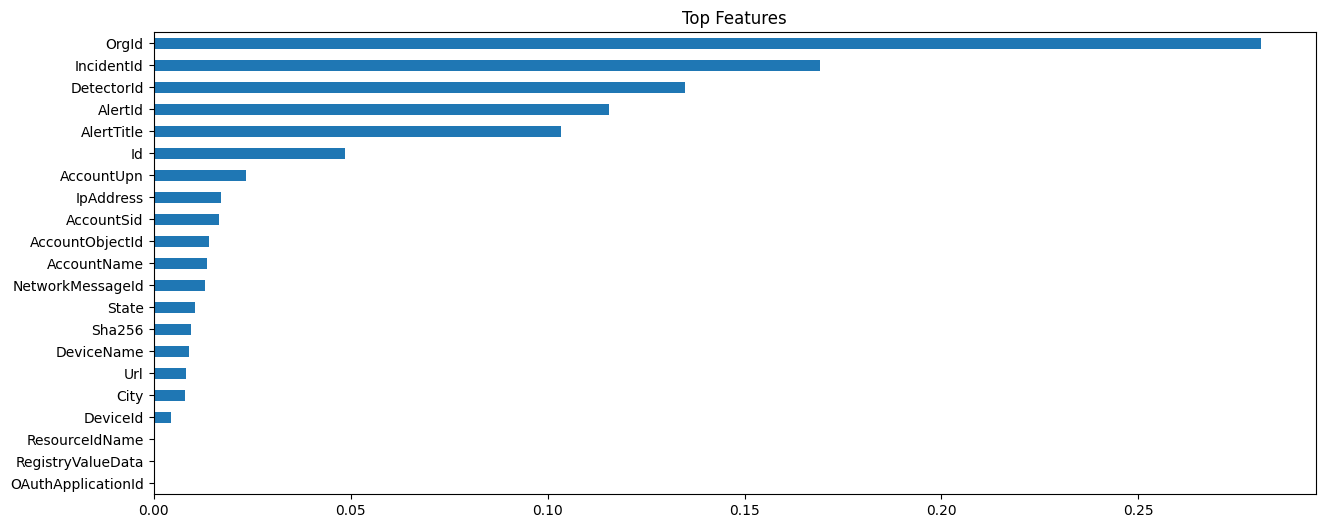

In [ ]:
# Feature Importance (from Random Forest)

importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

print("Feature importance: ", feature_importance)


# # # Plot
feature_importance.sort_values().plot(kind='barh', title='Top Features', figsize=(15, 6))
plt.show()


## Cross - Validation

* Performing k-fold cross-validation to confirm the robustness of your model performance.

In [ ]:
from sklearn.model_selection import cross_val_score

# preform cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=3, scoring="f1_macro")

#The F1 score is a preferred metric over accuracy for class-imbalanced datasets

print("Cross- validation for f1-macro score : ", cv_scores)
print("Average f1-macro score : ", cv_scores.mean())


Cross- validation for f1-macro score :  [0.97143326 0.97104395 0.97166498]
Average f1-macro score :  0.9713807295156015


**As we an see Cross-Validation for Random Forest Model perform well ,acheiving overall an 97% with all Class and Average f1-macro**

## Confusion Matrix

- Error Analysis:

  Even with high accuracy, understanding where the model makes mistakes can provide valuable insights.

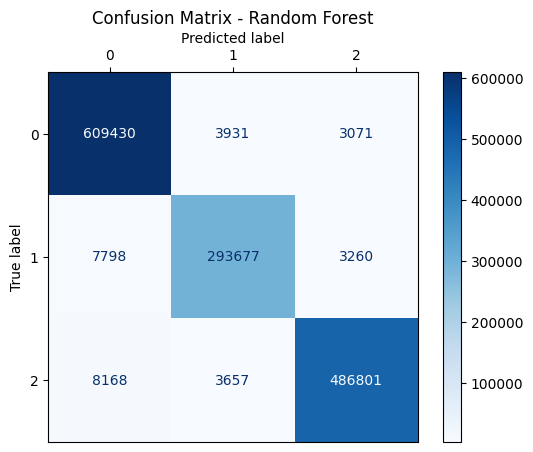

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_val, y_val_rf)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.gca().xaxis.set_label_position('top')
plt.gca().xaxis.tick_top()
plt.show()


In [33]:
# # misclassified analysis
# misclassified = X_val[y_val != y_val_rf]
# misclassified_labels = y_val[y_val != y_val_rf]

# misclassified.head()
# # print(misclassified_labels.head())

## Evaluate Performance

In [31]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [37]:


# Predictions
y_val_pred = rf_model.predict(X_val)

# Metrics
print("Precision:", precision_score(y_val, y_val_pred, average='macro'))
print("Recall:", recall_score(y_val, y_val_pred, average='macro'))
print("F1 Score:", f1_score(y_val, y_val_pred, average='macro'))


Precision: 0.9788150334298872
Recall: 0.9762128825355157
F1 Score: 0.9774762742607027


In [16]:
# metrics func
def evaluate_model(Actual , Predicted):
    accuracy = accuracy_score(Actual, Predicted) * 100
    precision = precision_score(Actual, Predicted, average='macro') * 100
    recall = recall_score(Actual, Predicted, average='macro') * 100
    f1 = f1_score(Actual, Predicted, average='macro') * 100

    return pd.DataFrame({
        "Metrics": ["Accuracy", "Precision", "Recall", "Macro F1"],
        "Values": [accuracy, precision, recall, f1]
    }).set_index("Metrics")

In [40]:
# Metrics for Train
Train_metrics = evaluate_model(y_train, rf_model.predict(X_train))
Train_metrics


,Values
Metrics,
Accuracy,99.999849
Precision,99.999789
Recall,99.999868
Macro F1,99.999829


In [41]:
# Metrics for Test
Test_metrics = evaluate_model(y_val, y_val_pred)
Test_metrics


,Values
Metrics,
Accuracy,97.895116
Precision,97.881503
Recall,97.621288
Macro F1,97.747627


In [42]:
# Overall Train and  Test Metrics
Overall_metrics = pd.concat([Train_metrics, Test_metrics], axis=1)
Overall_metrics.columns = ["Train", "Test"]
Overall_metrics

,Train,Test
Metrics,,
Accuracy,99.999849,97.895116
Precision,99.999789,97.881503
Recall,99.999868,97.621288
Macro F1,99.999829,97.747627


___

___

# Final Evaluation on Test Set

In [5]:
# load the Test Data
test_data = pd.read_csv("/content/drive/MyDrive/Microsoft-cybersecurity/GUIDE_Test.csv")

<ipython-input-5-5b7adee41b77>:2: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv("/content/drive/MyDrive/Microsoft-cybersecurity/GUIDE_Test.csv")


In [9]:
df_selected = ['AlertId', 'IncidentId', 'OrgId', 'AlertTitle', 'DetectorId', 'AccountUpn', 'AccountSid', 'AccountName', 'AccountObjectId', 'IpAddress', 'DeviceName', 'City', 'Url', 'State', 'Sha256', 'Id', 'DeviceId', 'ResourceIdName', 'OAuthApplicationId', 'NetworkMessageId', 'RegistryValueData']

In [11]:
# load the random forest model
import joblib
rf_model = joblib.load('/content/drive/MyDrive/Microsoft-cybersecurity/rf_model.pkl')


In [12]:
X_test = test_data[df_selected]
y_test = test_data['IncidentGrade']

In [27]:
# Convert the Categorical to Numerical for Target variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)

In [14]:
X_test.shape

(4147992, 21)

In [19]:
X_test.head()

,AlertId,IncidentId,OrgId,AlertTitle,DetectorId,AccountUpn,AccountSid,AccountName,AccountObjectId,IpAddress,DeviceName,City,Url,State,Sha256,Id,DeviceId,ResourceIdName,OAuthApplicationId,NetworkMessageId,RegistryValueData
0,87199,11767,657,563,524,3699,2610,863,425863,360606,153085,10630,160396,1445,138268,1245540519230,98799,3586,881,529644,860
1,632273,91158,3,2,2,673934,441377,453297,425863,360606,2833,10630,160396,1445,138268,1400159342154,1239,3586,881,529644,860
2,131719,32247,145,10807,2932,673934,441377,453297,425863,360606,153085,10630,160396,1445,4296,1279900255923,98799,3586,881,529644,860
3,917686,15294,222,0,0,673934,441377,453297,425863,360606,153085,10630,160396,1445,138268,60129547292,98799,3586,881,529644,860
4,5944,7615,363,18,27,673934,133549,136104,425863,360606,153085,10630,160396,1445,138268,515396080539,98799,3586,881,529644,860


In [15]:
# Prediction
y_test_pred = rf_model.predict(X_test)

In [29]:
# Final Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.91      0.94      0.92   1752940
           1       0.89      0.86      0.87    902698
           2       0.94      0.92      0.93   1492354

    accuracy                           0.91   4147992
   macro avg       0.91      0.91      0.91   4147992
weighted avg       0.91      0.91      0.91   4147992



In [32]:
metrics = evaluate_model(y_test, y_test_pred)
metrics

,Values
Metrics,
Accuracy,91.422380
Precision,91.103243
Recall,90.534825
Macro F1,90.801215


In [33]:
# save the Test result
metrics.to_csv("/content/drive/MyDrive/Microsoft-cybersecurity/Final_Test_result.csv")